   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0

/tmp/ipykernel_33/3652619448.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quality_values = [row[-1] for row in neighbors]  # Poslednja kolona predstavlja ciljnu promenljivu 'Quality'


Vrednost predikcije (Quality): 0.051925766206349235
Novi podatak [0, -3.970048523, -2.512336381, 5.346329613, -1.012008712, 1.844900361, 0.329839797, -0.491590483] ima predikciju za 'Quality': 0.051925766206349235


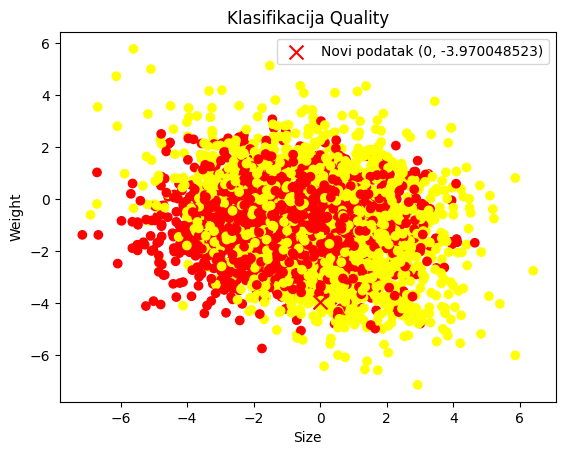

In [10]:
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje podataka
data = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
print(data.head())

data['Quality'] = data['Quality'].map({'good': 1, 'bad': 0})  # 'good' -> 1, 'bad' -> 0

# Prikaz prvih nekoliko redova skupa podataka
print(data.head())

data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Novi podatak za klasifikaciju
new_data =  [0,-3.970048523,-2.512336381,5.346329613,-1.012008712,1.844900361,0.329839797,-0.491590483]

# Određivanje vrednosti za K
K = int(sqrt(len(data)))

# Funkcija za izračunavanje euklidske udaljenosti između dva podatka
def Euclidean_distance(first, second):
    return sqrt(sum((a - b) ** 2 for a, b in zip(first, second)))


# Funkcija za pronalaženje K najbližih suseda
def Get_Neighbors(data, new_data, k):
    distances = [(row[:-1], Euclidean_distance(new_data, row[:-1])) for _, row in data.iterrows()]
    distances.sort(key=lambda x: x[1])
    neighbors = [row for row, _ in distances[:k]]
    return neighbors

# Funkcija za predikciju klase novog podatka
def predict_classification(data, new_data, k):
    neighbors = Get_Neighbors(data, new_data, k)
    quality_values = [row[-1] for row in neighbors]  # Poslednja kolona predstavlja ciljnu promenljivu 'Quality'
    prediction = sum(quality_values) / len(quality_values)  # Srednja vrednost kvaliteta najbližih suseda
    print(f"Vrednost predikcije (Quality): {prediction}")  # Dodato ispisivanje predikcije
    return prediction

# Prikaz rezultata
prediction = predict_classification(data, new_data, K)
print(f"Novi podatak {new_data} ima predikciju za 'Quality': {prediction}")

# Prikazivanje podataka i novog podatka na grafiku
colors = {1: 'yellow', 0: 'red'}  # Prilagodite boje klasama u svom datasetu
plt.scatter(data['Size'], data['Weight'], c=data['Quality'].map(colors))
plt.scatter(new_data[0], new_data[1], c=colors[round(prediction)], marker='x', s=100, label=f'Novi podatak ({new_data[0]}, {new_data[1]})')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Klasifikacija Quality')
plt.legend()
plt.show()
